<a href="https://colab.research.google.com/github/m677s345/EECS_731_SEMESTER_PROJECT_TRENDING/blob/main/EECS_731__Semester_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:


!pip install cookiecutter
!cookiecutter https://github.com/drivendata/cookiecutter-data-science


You've downloaded /root/.cookiecutters/cookiecutter-data-science before. Is it okay to delete and re-download it? [yes]: 







project_name [project_name]: repo_name [project_name]: author_name [Your name (or your organization/company/team)]: description [A short description of the project.]: Select open_source_license:
1 - MIT
2 - BSD-3-Clause
3 - No license file
Choose from 1, 2, 3 [1]: s3_bucket [[OPTIONAL] your-bucket-for-syncing-data (do not include 's3://')]: aws_profile [default]: Select python_interpreter:
1 - python3
2 - python
Choose from 1, 2 [1]: 
Error: "project_name" directory already exists


# Packages and Data Cleaning 

In [2]:
# libraries




import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib import rcParams
import collections
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS
import string
import re 
import nltk
from nltk.corpus import stopwords
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer

In [3]:
df = pd.read_csv("/content/project_name/data/raw/US_youtube_trending_data.csv",header=0)

In [ ]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [ ]:
df.columns

Index(['video_id', 'title', 'publishedAt', 'channelId', 'channelTitle',
       'categoryId', 'trending_date', 'tags', 'view_count', 'likes',
       'dislikes', 'comment_count', 'thumbnail_link', 'comments_disabled',
       'ratings_disabled', 'description'],
      dtype='object')

In [4]:
df.drop('comments_disabled',1,inplace=True)
df.drop('ratings_disabled',1,inplace=True)
df.drop('thumbnail_link',1,inplace=True)

In [ ]:
print(df.shape)
print(df.nunique())

(14198, 13)
video_id          2963
title             3029
publishedAt       2891
channelId         1526
channelTitle      1529
categoryId          15
trending_date       71
tags              2552
view_count       14145
likes            13451
dislikes          5193
comment_count     9192
description       3176
dtype: int64


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14198 entries, 0 to 14197
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   video_id       14198 non-null  object
 1   title          14198 non-null  object
 2   publishedAt    14198 non-null  object
 3   channelId      14198 non-null  object
 4   channelTitle   14198 non-null  object
 5   categoryId     14198 non-null  int64 
 6   trending_date  14198 non-null  object
 7   tags           14198 non-null  object
 8   view_count     14198 non-null  int64 
 9   likes          14198 non-null  int64 
 10  dislikes       14198 non-null  int64 
 11  comment_count  14198 non-null  int64 
 12  description    14130 non-null  object
dtypes: int64(5), object(8)
memory usage: 1.4+ MB


In [ ]:
df.drop('description',1,inplace=True)


In [ ]:
# Check any number of columns with NaN
print(df.isnull().any().sum(), ' / ', len(df.columns))
# Check any number of data points with NaN
print(df.isnull().any(axis=1).sum(), ' / ', len(df))

0  /  12
0  /  14198


In [5]:
df['publishedAt']=pd.to_datetime(df['publishedAt'])
df['trending_date']=pd.to_datetime(df['trending_date'])

In [ ]:
df.dtypes

video_id                      object
title                         object
publishedAt      datetime64[ns, UTC]
channelId                     object
channelTitle                  object
categoryId                     int64
trending_date    datetime64[ns, UTC]
tags                          object
view_count                     int64
likes                          int64
dislikes                       int64
comment_count                  int64
dtype: object

In [ ]:
df['publishedAt'].sort_values(ascending=False)
df.duplicated(subset=['video_id'],keep='first')
df.drop_duplicates(subset=['video_id'],keep='first')

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11 19:20:14+00:00,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12 00:00:00+00:00,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11 17:00:10+00:00,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12 00:00:00+00:00,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11 16:34:06+00:00,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12 00:00:00+00:00,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11 16:38:55+00:00,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12 00:00:00+00:00,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11 15:10:05+00:00,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12 00:00:00+00:00,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196
...,...,...,...,...,...,...,...,...,...,...,...,...
14082,_qOuVkFaUZg,#89 Khabib Nurmagomedov | Real Quick With Mike...,2020-10-19 14:31:30+00:00,UCxY3IbiquwT3QjrgIgg86KQ,Real Quick With Mike Swick Podcast,24,2020-10-21 00:00:00+00:00,Real Quick with Mike Swick|AKA Thailand|Podcas...,140867,6247,83,1711
14083,W7kFGGFI9Xo,DIEHARD IS BACK | 2:00 Film,2020-10-18 20:35:18+00:00,UCayVu430iDHT0FNIB-3-hoQ,Advance Auto Parts,2,2020-10-21 00:00:00+00:00,die hard|diehard|diehardisback|cars|movies,652879,6415,355,603
14095,xVIfx8UR4Fo,10 Things You Didn’t Know About Justin Gaethje!,2020-10-19 13:30:07+00:00,UCNxIH_iATJ8CjsXx3m7jXvg,Watch MMA,17,2020-10-21 00:00:00+00:00,ufc|ufc today|justin gaethje|gaethje|gaethje v...,167237,4324,324,650
14124,9sa5xtyWcYU,Dead by Daylight | The Realm Beyond | Part 2,2020-10-20 15:00:06+00:00,UCaSgsFdGbwjfdawl3rOXiwQ,Dead by Daylight,20,2020-10-21 00:00:00+00:00,dead by daylight|dbd|behaviour interactive|bhv...,124436,11794,110,1188


In [ ]:
print (df['trending_date'].min())
print (df['trending_date'].max())

2020-08-12 00:00:00+00:00
2020-10-21 00:00:00+00:00


# Data Visualization

In [6]:
df['likes_log'] = np.log(df['likes']+1)
df['views_log'] = np.log(df['view_count'] +1)
df['dislikes_log'] = np.log(df['dislikes'] +1)
df['comment_count_log'] = np.log(df['comment_count']+1)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

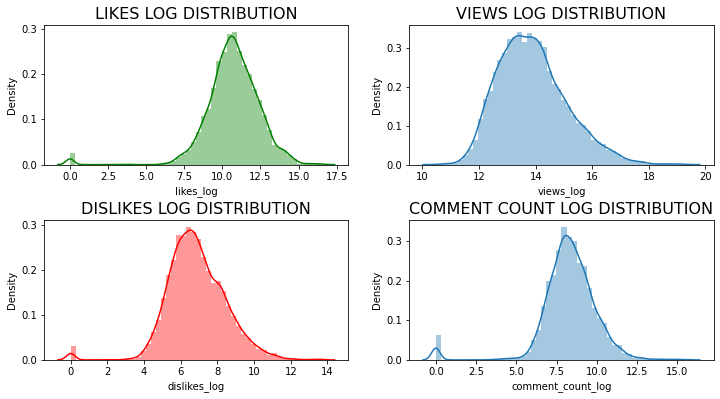

In [7]:
plt.figure(figsize = (12,6))
plt.subplot(221)
g1 = sns.distplot(df['likes_log'], color = 'green')
g1.set_title("LIKES LOG DISTRIBUTION", fontsize = 16)

plt.subplot(222)
g2 = sns.distplot(df['views_log'])
g2.set_title("VIEWS LOG DISTRIBUTION", fontsize = 16)

plt.subplot(223)
g3 = sns.distplot(df['dislikes_log'], color = 'r')
g3.set_title("DISLIKES LOG DISTRIBUTION", fontsize=16)

plt.subplot(224)
g4 = sns.distplot(df['comment_count_log'])
g4.set_title("COMMENT COUNT LOG DISTRIBUTION", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)

plt.show()

In [8]:
np.unique(df["categoryId"])

array([ 1,  2, 10, 15, 17, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29])

In [9]:
df['category_name'] = np.nan

df.loc[(df['categoryId'] == 1),  "category_name"] = 'Film and Animation'
df.loc[(df['categoryId'] == 2),  "category_name"] = 'Cars and Vehicles'
df.loc[(df['categoryId'] == 10), "category_name"] = 'Music'
df.loc[(df['categoryId'] == 15), "category_name"] = 'Pet and Animals'
df.loc[(df['categoryId'] == 17), "category_name"] = 'Sports'
df.loc[(df['categoryId'] == 19), "category_name"] = 'Travel and Events'
df.loc[(df['categoryId'] == 20), "category_name"] = 'Gaming'
df.loc[(df['categoryId'] == 22), "category_name"] = 'People and Blogs'
df.loc[(df['categoryId'] == 23), "category_name"] = 'Comedy'
df.loc[(df['categoryId'] == 24), "category_name"] = 'Entertainment'
df.loc[(df['categoryId'] == 25), "category_name"] = 'News and Politics'
df.loc[(df['categoryId'] == 26), "category_name"] = 'How to and Style'
df.loc[(df['categoryId'] == 27), "category_name"] = 'Education'
df.loc[(df['categoryId'] == 28), "category_name"] = 'Science and Technology'
df.loc[(df['categoryId'] == 29), "category_name"] = 'Non-profits and Activism'
df.loc[(df['categoryId'] == 43), "category_name"] = 'Shows'

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


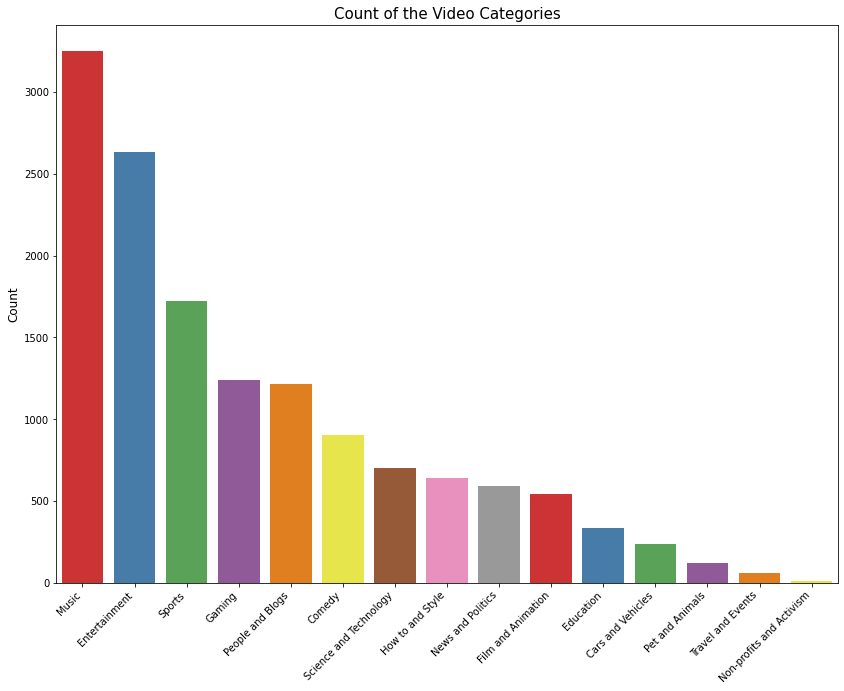

In [10]:
plt.figure(figsize = (14,10))
g = sns.countplot('category_name', data = df, palette="Set1", order = df['category_name'].value_counts().index)
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Count of the Video Categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

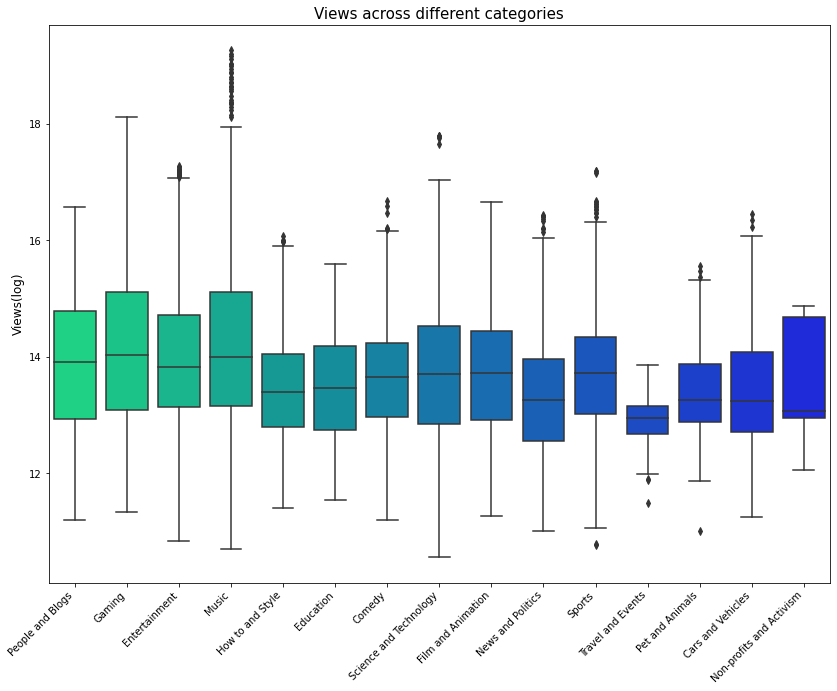

In [11]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'views_log', data = df, palette="winter_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Views across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Views(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

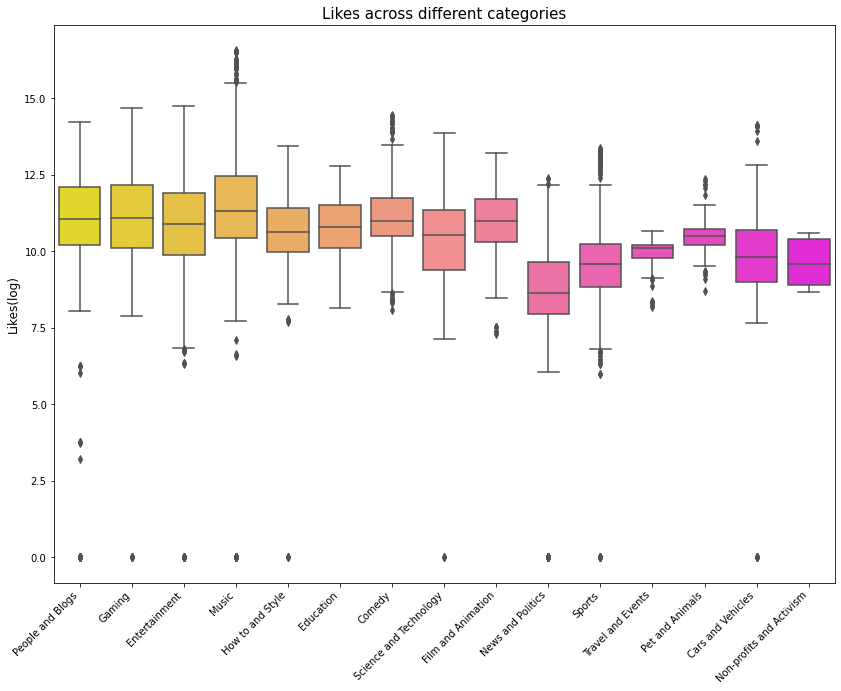

In [12]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'likes_log', data = df, palette="spring_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Likes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Likes(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

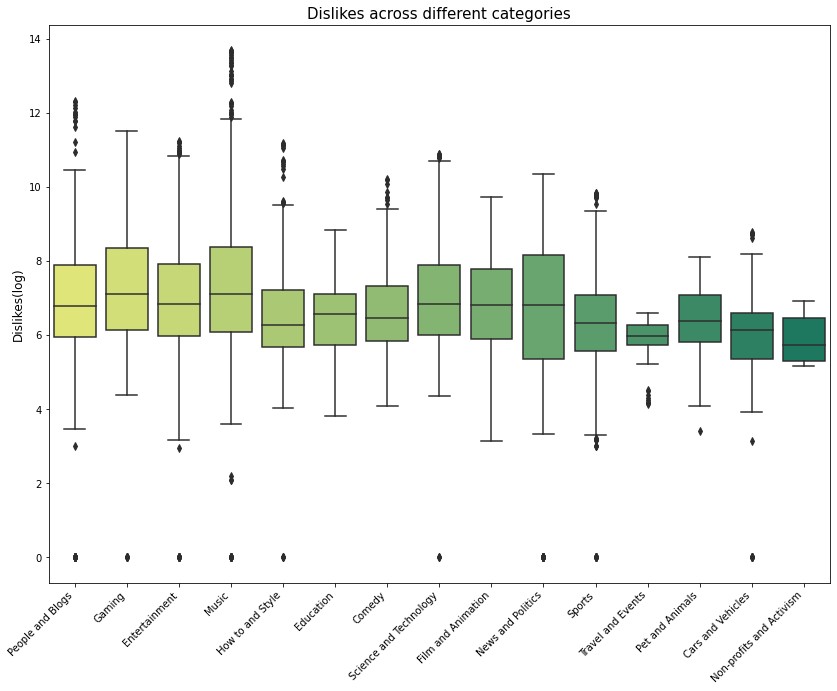

In [13]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'dislikes_log', data = df, palette="summer_r")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Dislikes across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Dislikes(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

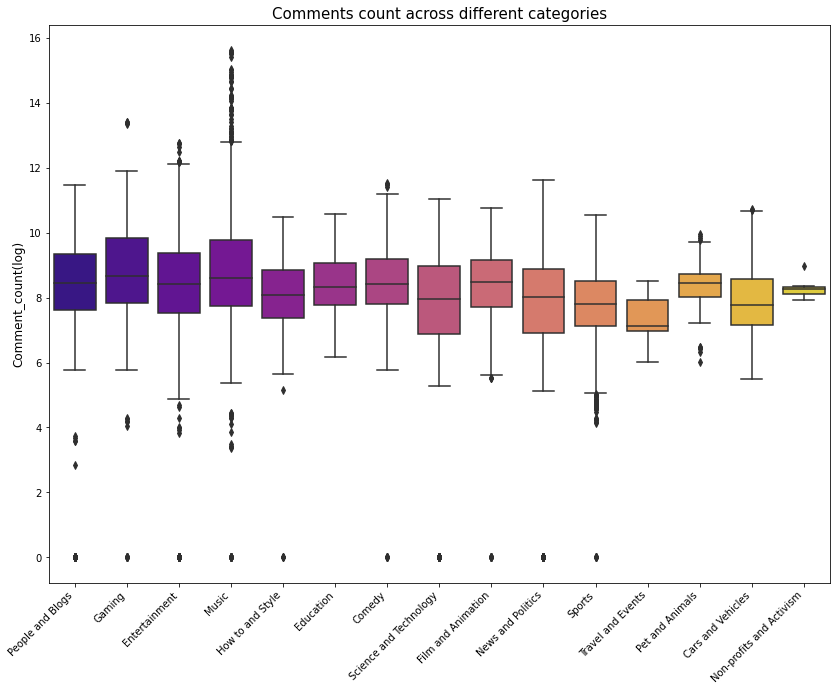

In [14]:
plt.figure(figsize = (14,10))
g = sns.boxplot(x = 'category_name', y = 'comment_count_log', data = df, palette="plasma")
g.set_xticklabels(g.get_xticklabels(),rotation=45, ha="right")
g.set_title("Comments count across different categories", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Comment_count(log)", fontsize=12)
plt.subplots_adjust(wspace = 0.9, hspace = 0.9, top = 0.9)
plt.show()

In [15]:
df['like_rate'] = df['likes']/df['view_count']
df['dislike_rate'] = df['dislikes']/df['view_count']
df['comment_rate'] = df['comment_count']/df['view_count']

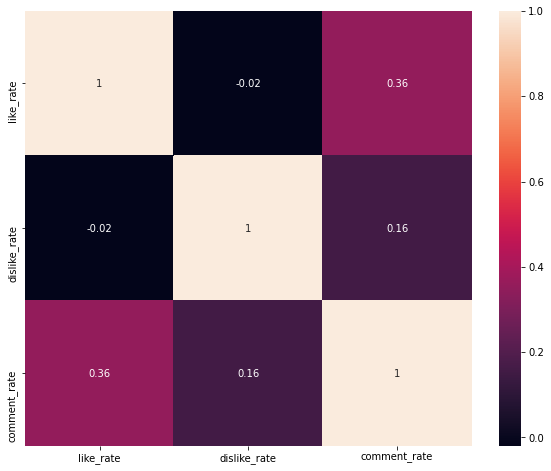

In [16]:
plt.figure(figsize = (10,8))
sns.heatmap(df[['like_rate', 'dislike_rate', 'comment_rate']].corr(), annot=True)
plt.show()

In [17]:
#Word count 
df['count_word']=df['title'].apply(lambda x: len(str(x).split()))
df['count_word_tags']=df['tags'].apply(lambda x: len(str(x).split()))

#Unique word count
df['count_unique_word'] = df['title'].apply(lambda x: len(set(str(x).split())))
df['count_unique_word_tags'] = df['tags'].apply(lambda x: len(set(str(x).split())))

#Punctutation count
df['count_punctuation'] = df['title'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))
df['count_punctuation_tags'] = df['tags'].apply(lambda x: len([c for c in str(x) if c in string.punctuation]))

#Average length of the words
df['mean_word_len'] = df['title'].apply(lambda x : np.mean([len(x) for x in str(x).split()]))
df['mean_word_len_tags'] = df['tags'].apply(lambda x: np.mean([len(x) for x in str(x).split()]))

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axe

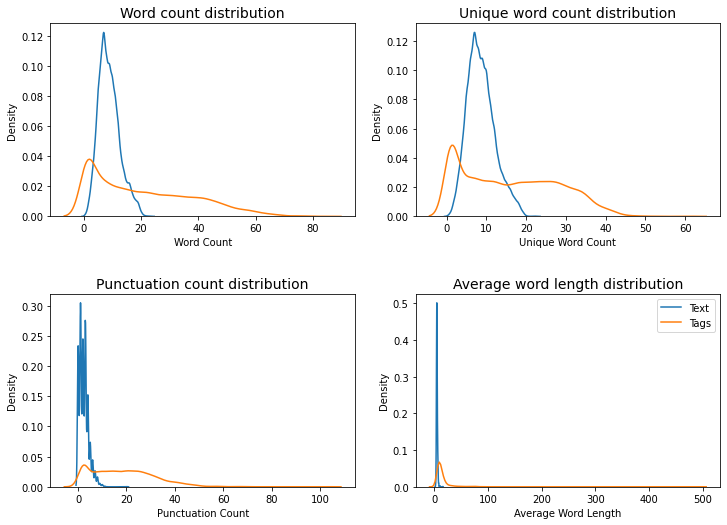

In [18]:
plt.figure(figsize = (12,18))

plt.subplot(421)
g1 = sns.distplot(df['count_word'],
                 hist = False, label = 'Text')
g1 = sns.distplot(df['count_word_tags'],
                 hist = False, label = 'Tags')
g1.set_title('Word count distribution', fontsize = 14)
g1.set(xlabel='Word Count')

plt.subplot(422)
g2 = sns.distplot(df['count_unique_word'],
                 hist = False, label = 'Text')
g2 = sns.distplot(df['count_unique_word_tags'],
                 hist = False, label = 'Tags')
g2.set_title('Unique word count distribution', fontsize = 14)
g2.set(xlabel='Unique Word Count')

plt.subplot(423)
g3 = sns.distplot(df['count_punctuation'],
                 hist = False, label = 'Text')
g3 = sns.distplot(df['count_punctuation_tags'],
                 hist = False, label = 'Tags')
g3.set_title('Punctuation count distribution', fontsize =14)
g3.set(xlabel='Punctuation Count')

plt.subplot(424)
g4 = sns.distplot(df['mean_word_len'],
                 hist = False, label = 'Text')
g4 = sns.distplot(df['mean_word_len_tags'],
                 hist = False, label = 'Tags')
g4.set_title('Average word length distribution', fontsize = 14)
g4.set(xlabel = 'Average Word Length')

plt.subplots_adjust(wspace = 0.2, hspace = 0.4, top = 0.9)
plt.legend()
plt.show()

# Title and tag specific visuialization and frequency analysis 

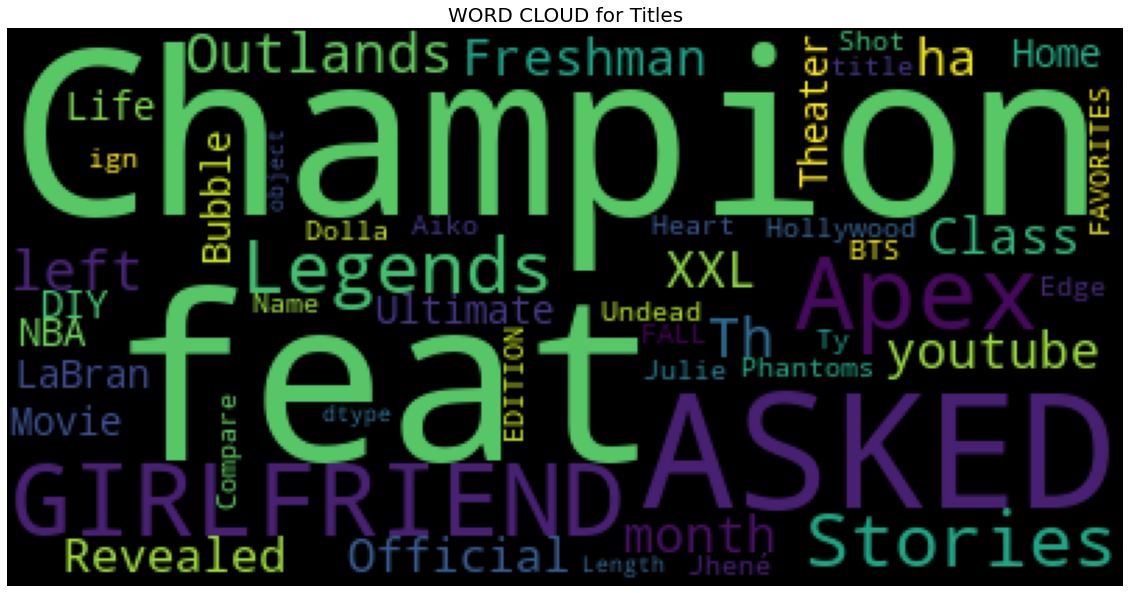

In [19]:
plt.figure(figsize = (20,20))
stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords=stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df['title']))

#Plotting the word cloud
plt.imshow(wordcloud)
plt.title("WORD CLOUD for Titles", fontsize = 20)
plt.axis('off')
plt.show()

In [20]:
all_titles = ' '.join(df['title'].str.lower())

import re

def tokens(text):
    "List all the word tokens in a text."
    return re.findall('[\w]+', text.lower())
new_titles=tokens(all_titles)


filtered_words = [word for word in new_titles if word not in stopwords]
counted_words = collections.Counter(filtered_words)

words = []
counts = []
for letter, count in counted_words.most_common(50):
    words.append(letter)
    counts.append(count)

<BarContainer object of 50 artists>

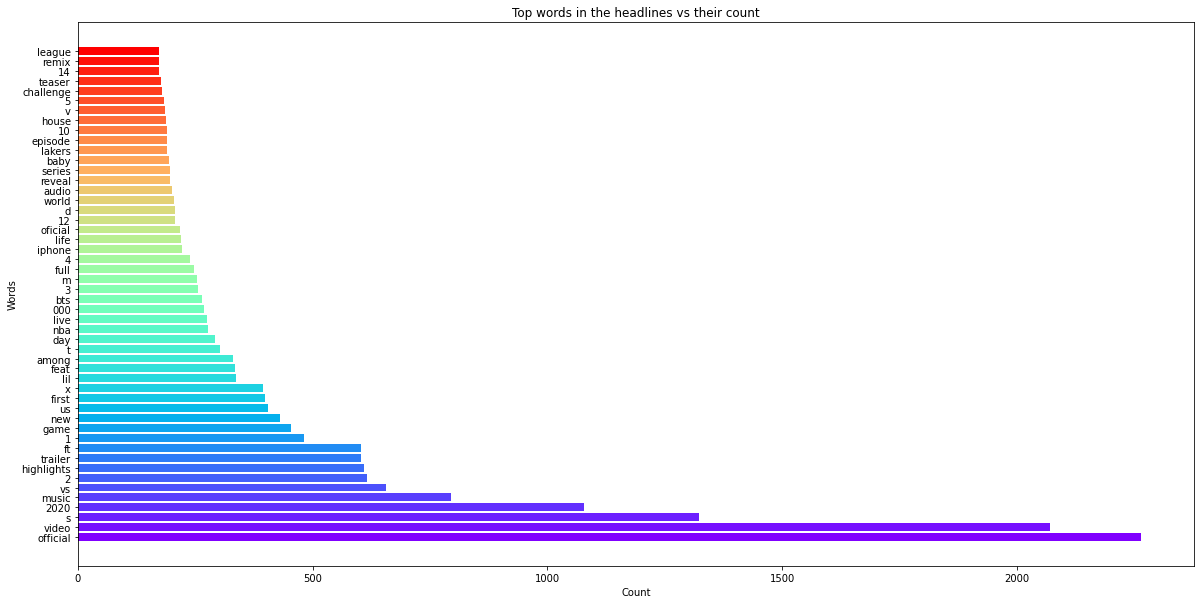

In [21]:
colors = cm.rainbow(np.linspace(0, 1, 50))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the headlines vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(words, counts, color=colors)

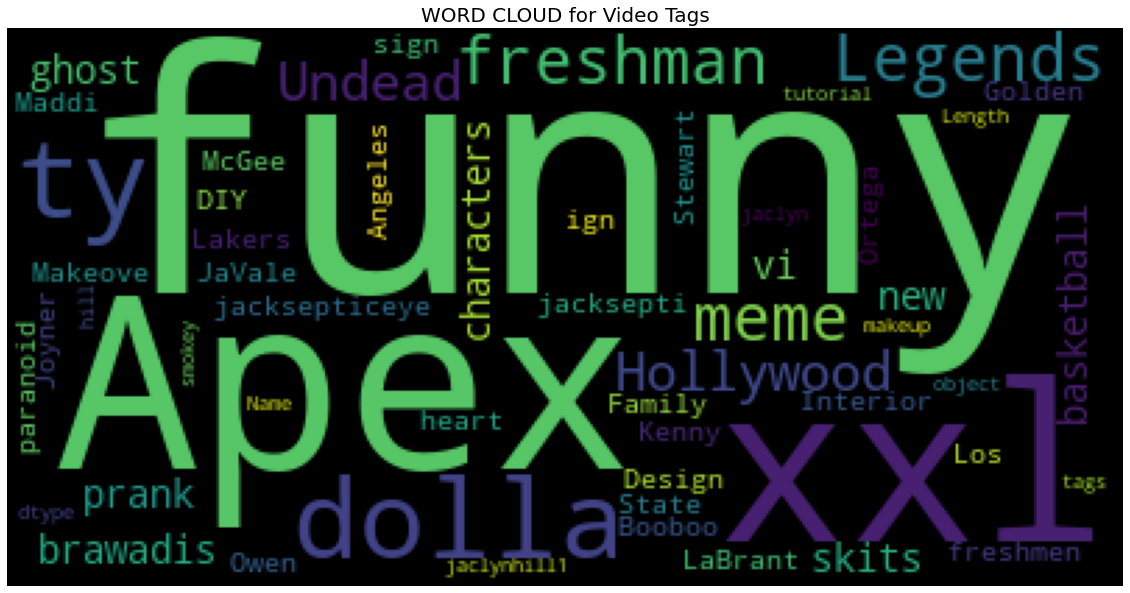

In [22]:
plt.figure(figsize = (20,20))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                      background_color = 'black',
                      stopwords = stopwords,
                      max_words = 1000,
                      max_font_size = 120,
                      random_state = 42
                    ).generate(str(df['tags']))

plt.imshow(wordcloud)
plt.title('WORD CLOUD for Video Tags', fontsize = 20)
plt.axis('off')
plt.show()

In [23]:
all_tags = ' '.join(df['tags'].str.lower())

import re

def tokens(text):
    "List all the word tokens in a text."
    return re.findall('[\w]+', text.lower())
new_tags=tokens(all_tags)


filtered_words = [word for word in new_tags if word not in stopwords]
counted_words = collections.Counter(filtered_words)

tag_words = []
tag_counts = []
for letter, count in counted_words.most_common(50):
    tag_words.append(letter)
    tag_counts.append(count)

In [24]:
filtered_words

['brawadis',
 'prank',
 'basketball',
 'skits',
 'ghost',
 'funny',
 'videos',
 'vlog',
 'vlogging',
 'nba',
 'browadis',
 'challenges',
 'bmw',
 'i8',
 'faze',
 'rug',
 'faze',
 'rug',
 'brother',
 'mama',
 'rug',
 'papa',
 'rug',
 'apex',
 'legends',
 'apex',
 'legends',
 'characters',
 'new',
 'apex',
 'legend',
 'apex',
 'legends',
 'rampart',
 'apex',
 'legends',
 'season',
 '6',
 'apex',
 'legends',
 'boosted',
 'battle',
 'pass',
 'season',
 '6',
 'battle',
 'pass',
 'apex',
 'legends',
 'new',
 'season',
 'apex',
 'legends',
 'game',
 'respawn',
 'apex',
 'legends',
 'battle',
 'royale',
 'game',
 'battle',
 'royale',
 'battle',
 'royale',
 'shooter',
 'apex',
 'games',
 'squad',
 'play',
 'multiplayer',
 'shooter',
 'apex',
 'legends',
 'ps4',
 'apex',
 'legends',
 'xbox',
 'apex',
 'legends',
 'pc',
 'apex',
 'legends',
 'origin',
 'respawn',
 'entertainment',
 'electronic',
 'arts',
 'titanfall',
 '2',
 'fun',
 'battle',
 'royale',
 'jacksepticeye',
 'funny',
 'funny',
 'mem

<BarContainer object of 50 artists>

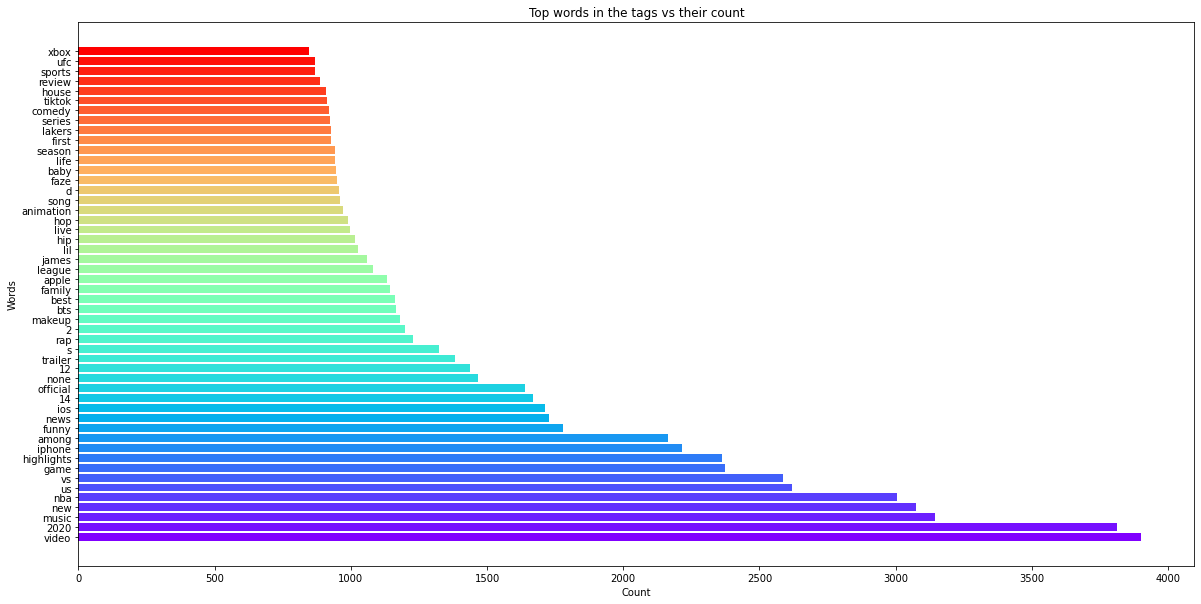

In [25]:
colors = cm.rainbow(np.linspace(0, 1, 50))
rcParams['figure.figsize'] = 20, 10

plt.title('Top words in the tags vs their count')
plt.xlabel('Count')
plt.ylabel('Words')
plt.barh(tag_words, tag_counts, color=colors)

In [26]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
split_tags=df.tags.str.split('|', expand=False) #splits the string based on |
print(split_tags)

df['tags']=split_tags



0        [brawadis, prank, basketball, skits, ghost, fu...
1        [Apex Legends, Apex Legends characters, new Ap...
2        [jacksepticeye, funny, funny meme, memes, jack...
3        [xxl freshman, xxl freshmen, 2020 xxl freshman...
4        [The LaBrant Family, DIY, Interior Design, Mak...
                               ...                        
14193    [JaVale McGee, Los Angeles Lakers, Golden Stat...
14194    [Hollywood Undead, hollywood undead heart of a...
14195    [ty dolla $ign, ty dolla sign paranoid, ty dol...
14196    [Kenny Ortega, Booboo Stewart, Owen Joyner, Ma...
14197    [jaclynhill1, jaclyn hill, makeup tutorial, sm...
Name: tags, Length: 14198, dtype: object


# Google trends API

In [237]:
!pip install pytrends


In [352]:
import pandas as pd
from pytrends.request import TrendReq
pytrend = TrendReq(hl='en-US', tz=360)

**timeframe**

Date to start from

Defaults to last 5yrs, 'today 5-y'.

Everything 'all'

Specific dates, 'YYYY-MM-DD YYYY-MM-DD' example '2016-12-14 2017-01-25'

Specific datetimes, 'YYYY-MM-DDTHH YYYY-MM-DDTHH' example '2017-02-06T10 2017-02-12T07'

Note Time component is based off UTC
Current Time Minus Time Pattern:

By Month: 'today #-m' where # is the number of months from that date to pull data for

For example: 'today 3-m' would get data from today to 3months ago
NOTE Google uses UTC date as 'today'
Seems to only work for 1, 2, 3 months only
Daily: 'now #-d' where # is the number of days from that date to pull data for

For example: 'now 7-d' would get data from the last week
Seems to only work for 1, 7 days only
Hourly: 'now #-H' where # is the number of hours from that date to pull data for

For example: 'now 1-H' would get data from the last hour
Seems to only work for 1, 4 hours only

**kw_list**

keywords to get data for

Example ['Pizza']

Up to five terms in a list: ['Pizza', 'Italian', 'Spaghetti', 'Breadsticks', 'Sausage']

Advanced Keywords

When using Google Trends dashboard Google may provide suggested narrowed search terms.
For example "iron" will have a drop down of "Iron Chemical Element, Iron Cross, Iron Man, etc".
Find the encoded topic by using the get_suggestions() function and choose the most relevant one for you.
For example: https://www.google.com/trends/explore#q=%2Fm%2F025rw19&cmpt=q
"%2Fm%2F025rw19" is the topic "Iron Chemical Element" to use this with pytrends
You can also use pytrends.suggestions() to automate this.

**gprop**

What Google property to filter to
Example 'images'
Defaults to web searches
Can be images, news, youtube or froogle (for Google Shopping results)

Below is the format for building payloads for the pytrends API

```
#kw_list = ["Blockchain"]
pytrends.build_payload(kw_list, cat=0, timeframe='today 5-y', geo='', gprop='')
```



In [358]:
df_tags = pd.DataFrame(data=tag_words,columns=['tags'])
df_tags['counts'] = tag_counts
df_tags.head()

,tags,counts
0,video,3902
1,2020,3811
2,music,3143
3,new,3074
4,nba,3004


In [359]:
kw_list = df_tags['tags'].head(5).values.tolist()
print(kw_list)


['video', '2020', 'music', 'new', 'nba']


In [367]:

def newtrend(kw_list,timeframe):
  pytrend.build_payload(kw_list, timeframe=timeframe, geo='US', gprop='youtube')
  trends = pytrend.interest_over_time()
  trends.plot.line()

In [366]:
trends.head()

,Apex,funny,xxl,Legends,dolla,isPartial
date,,,,,,
2020-08-12,13,88,4,22,1,False
2020-08-13,12,85,4,20,1,False
2020-08-14,19,86,6,26,1,False
2020-08-15,15,85,6,23,2,False
2020-08-16,13,85,6,21,2,False


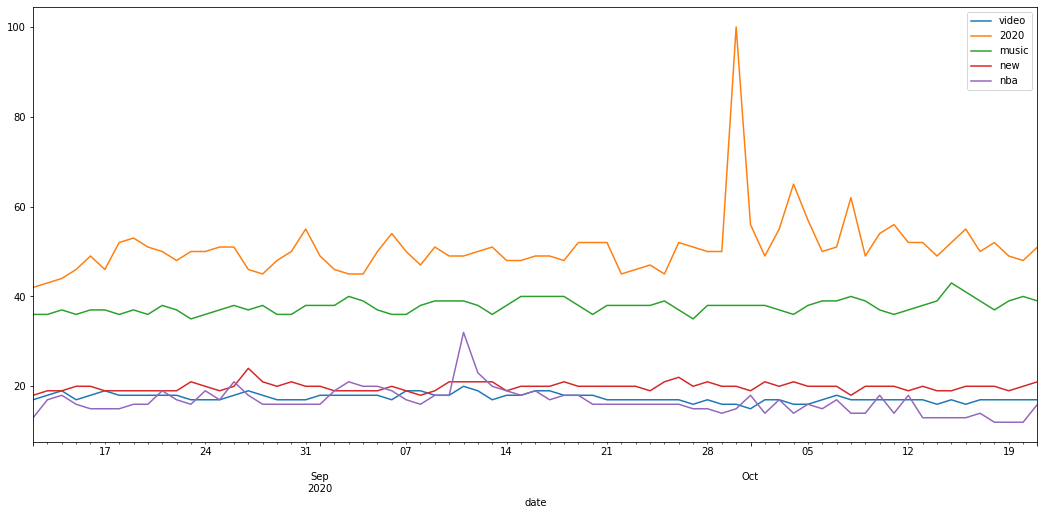

In [368]:
kw_list = df_tags['tags'].head(5).values.tolist()
timeframe='2020-08-12 2020-10-21'

newtrend(kw_list,timeframe)

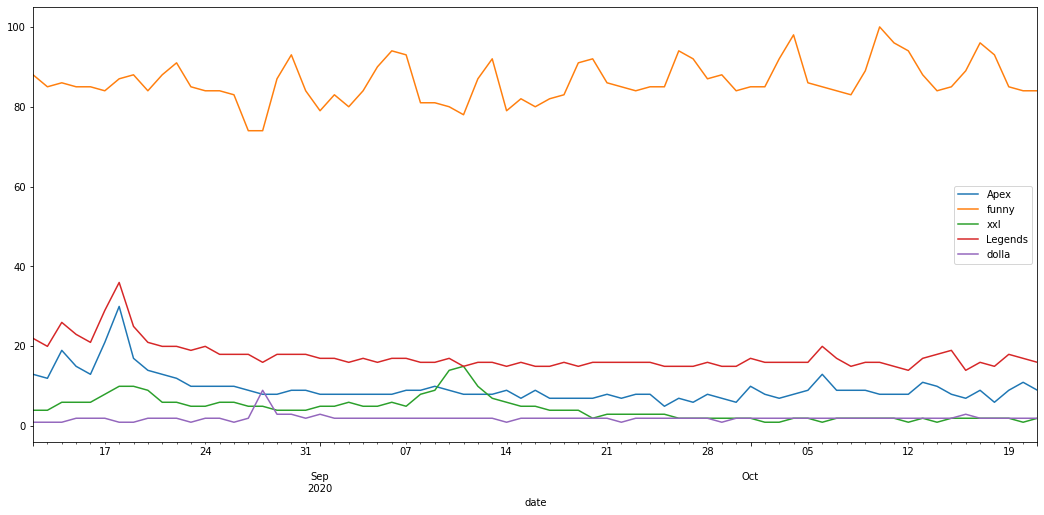

In [369]:
wordcloud_tags = ['Apex','funny', 'xxl', 'Legends','dolla']
timeframe='2020-08-12 2020-10-21'
newtrend(wordcloud_tags , timeframe)

# Time Series forcasting with ARMA on Apex

In [279]:
pytrend.build_payload(wordcloud_tags, timeframe=timeframe, geo='US', gprop='youtube')
trends = pytrend.interest_over_time()
trends = trends.set_index(pd.to_datetime(trends.index))

In [268]:
print(trends)

            Apex  funny  xxl  Legends  dolla  isPartial
date                                                   
2020-08-12    13     88    4       22      1      False
2020-08-13    12     85    4       20      1      False
2020-08-14    19     86    6       26      1      False
2020-08-15    15     85    6       23      2      False
2020-08-16    13     85    6       21      2      False
...          ...    ...  ...      ...    ...        ...
2020-10-17     9     96    2       16      2      False
2020-10-18     6     93    2       15      2      False
2020-10-19     9     85    2       18      2      False
2020-10-20    11     84    1       17      2      False
2020-10-21     9     84    2       16      2      False

[71 rows x 6 columns]


In [280]:
series = pd.Series(trends['Apex'].values, index = trends.index)


In [289]:
series

date
2020-08-12    13
2020-08-13    12
2020-08-14    19
2020-08-15    15
2020-08-16    13
              ..
2020-10-17     9
2020-10-18     6
2020-10-19     9
2020-10-20    11
2020-10-21     9
Length: 71, dtype: int64

In [293]:
import plotly.express as px
fig=px.line(trends,x=trends.index,y='Apex',title='Google trends data for Apex')
fig.show()


In [299]:
series = series.resample('d').sum()
series = series.cumsum()/

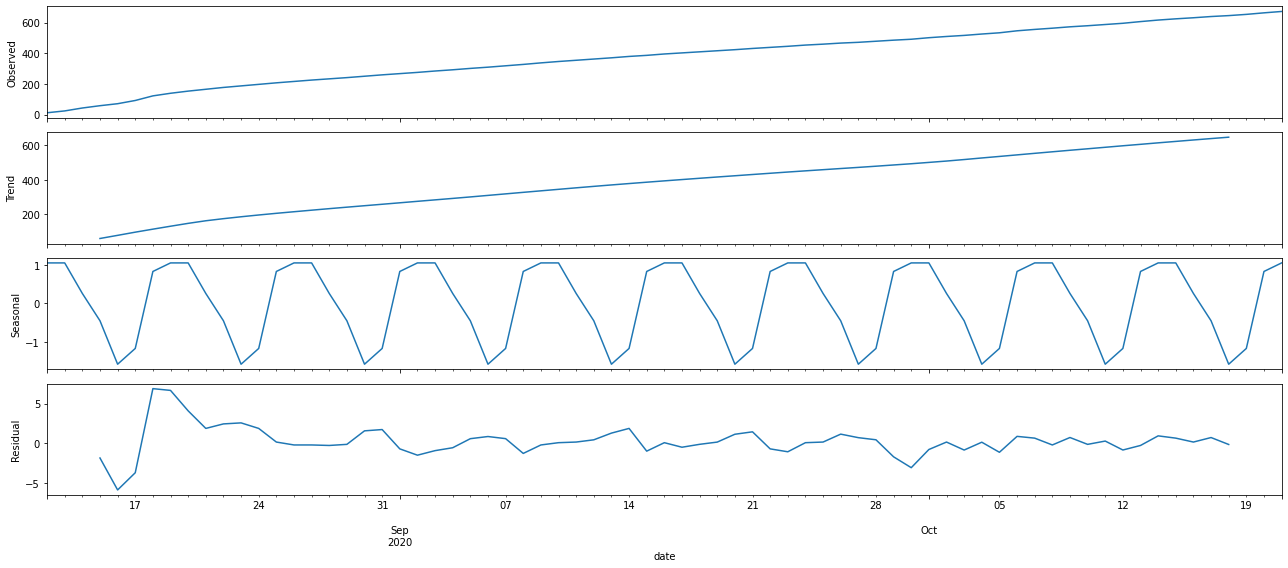

In [165]:
#The best part about time series data and decomposition is that you can break down the data into the following:
#Time Series Decomposition. 
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(series, model='additive')
fig = decomposition.plot()
plt.show()



In [117]:
#GRID SEARCH for Param Tuning.
#Sample params for seasonal arima. (SARIMAX).

#For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function 
#from the statsmodels module and assess its overall quality.

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]

In [118]:

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}26 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 26)26 - AIC:1047.0649840268015
SARIMA(0, 0, 0)x(0, 1, 0, 26)26 - AIC:601.6070669654603
SARIMA(0, 0, 0)x(1, 0, 0, 26)26 - AIC:559.6656519760832
SARIMA(0, 0, 0)x(1, 1, 0, 26)26 - AIC:189.48109434303427
SARIMA(0, 0, 1)x(0, 0, 0, 26)26 - AIC:944.9337738718197
SARIMA(0, 0, 1)x(0, 1, 0, 26)26 - AIC:532.3005848864216
SARIMA(0, 0, 1)x(1, 0, 0, 26)26 - AIC:506.3335716585793
SARIMA(0, 0, 1)x(1, 1, 0, 26)26 - AIC:171.2605714998481
SARIMA(0, 1, 0)x(0, 0, 0, 26)26 - AIC:517.151991568662
SARIMA(0, 1, 0)x(0, 1, 0, 26)26 - AIC:262.6399106541745
SARIMA(0, 1, 0)x(1, 0, 0, 26)26 - AIC:236.5680665030447


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 1, 0)x(1, 1, 0, 26)26 - AIC:78.26392833703342
SARIMA(0, 1, 1)x(0, 0, 0, 26)26 - AIC:436.75785311497765
SARIMA(0, 1, 1)x(0, 1, 0, 26)26 - AIC:236.31208081588855
SARIMA(0, 1, 1)x(1, 0, 0, 26)26 - AIC:223.24851542456307
SARIMA(0, 1, 1)x(1, 1, 0, 26)26 - AIC:80.06154478498254
SARIMA(1, 0, 0)x(0, 0, 0, 26)26 - AIC:468.0978603124712
SARIMA(1, 0, 0)x(0, 1, 0, 26)26 - AIC:257.03150464065715
SARIMA(1, 0, 0)x(1, 0, 0, 26)26 - AIC:164.21794705858062
SARIMA(1, 0, 0)x(1, 1, 0, 26)26 - AIC:77.41684412661122
SARIMA(1, 0, 1)x(0, 0, 0, 26)26 - AIC:404.73087406227444
SARIMA(1, 0, 1)x(0, 1, 0, 26)26 - AIC:239.04671575223935
SARIMA(1, 0, 1)x(1, 0, 0, 26)26 - AIC:165.42668270543777
SARIMA(1, 0, 1)x(1, 1, 0, 26)26 - AIC:79.3609496523726
SARIMA(1, 1, 0)x(0, 0, 0, 26)26 - AIC:340.75190160715056
SARIMA(1, 1, 0)x(0, 1, 0, 26)26 - AIC:230.68870553683013
SARIMA(1, 1, 0)x(1, 0, 0, 26)26 - AIC:177.02131184816275
SARIMA(1, 1, 0)x(1, 1, 0, 26)26 - AIC:76.87981233152047
SARIMA(1, 1, 1)x(0, 0, 0, 26)26 - AIC:

In [119]:
#Fit the model with the best params.
#SARIMA(1, 1, 0)x(1, 1, 0, 26)26 - AIC:76.87981233152047

#we should consider this to be optimal option.

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 1, 0),
                                seasonal_order=(1, 1, 0, 26),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1215      0.275      0.442      0.658      -0.417       0.660
ar.S.L26      -0.0640      0.110     -0.583      0.560      -0.279       0.151
sigma2         3.7868      1.797      2.107      0.035       0.265       7.309


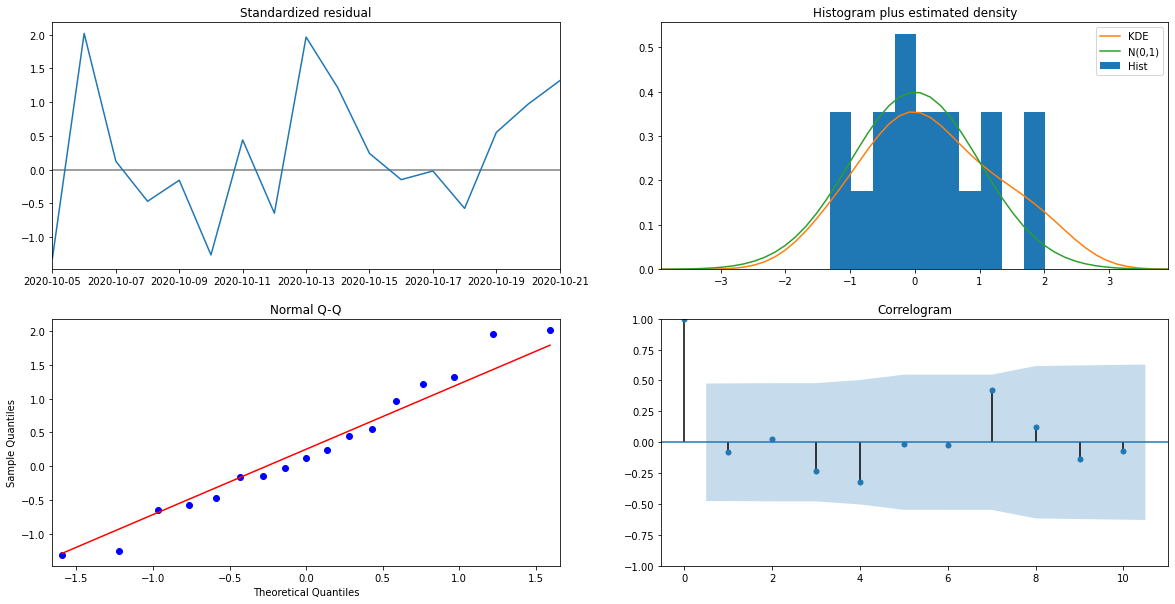

In [120]:
#Plotting the diagnostics.

#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
results.plot_diagnostics(figsize=(20,10))
plt.show()


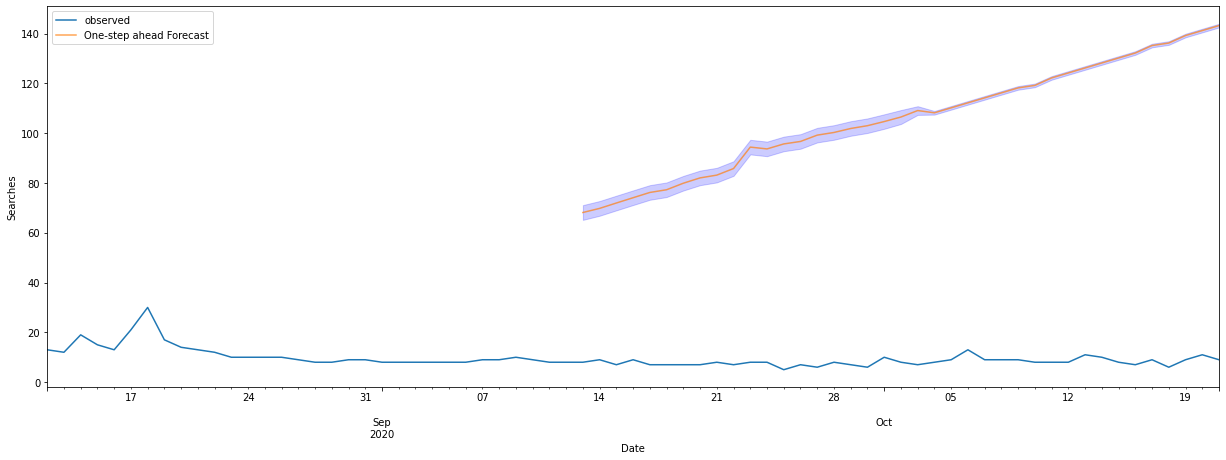

In [295]:
#Lets get the predictions and confidence interval for those predictions.
#Get the predictions. The forecasts start from the 1st of Jan 2017 but the previous line shows how it fits to the data.
pred = results.get_prediction(start=pd.to_datetime('2020-09-13'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int(95)

#Plotting real and forecasted values.
ax = series.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(21, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Searches')
plt.legend()
plt.show()

#Takeaway: The forecats seems to be fitting well to the data. The Blue/purple thicker plot shows the confidence level in the forecasts. 

In [122]:
#Getting the mean squared error (average error of forecasts).
y_forecasted = pred.predicted_mean
y_truth = series['2020-09-22':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

#Smaller the better.

MSE 3.4


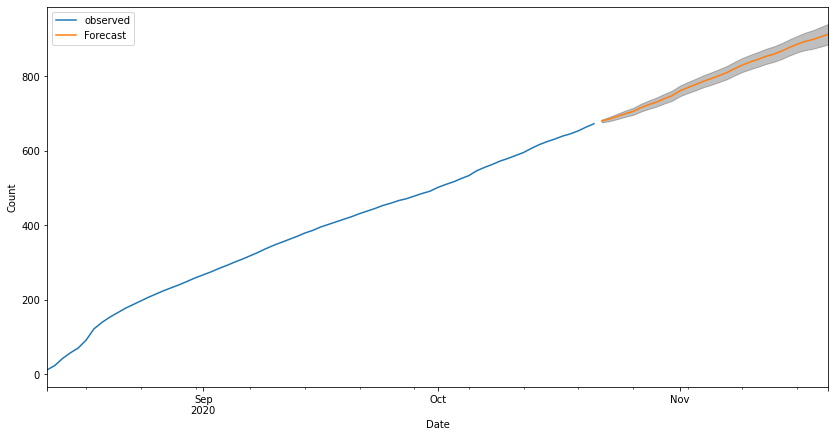

In [167]:
#The time can be changed using steps.
pred_uc = results.get_forecast(steps=30)
pred_ci = pred_uc.conf_int(95)
ax = series.plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()
plt.show()


# Time Series forcasting with ARMA on dolla

In [274]:
kw_list=['dolla']
pytrend.build_payload(kw_list, timeframe=timeframe, geo='US', gprop='youtube')
trends = pytrend.interest_over_time()
trends = trends.set_index(pd.to_datetime(trends.index))

In [275]:
series = pd.Series(trends['dolla'].values, index = trends.index)


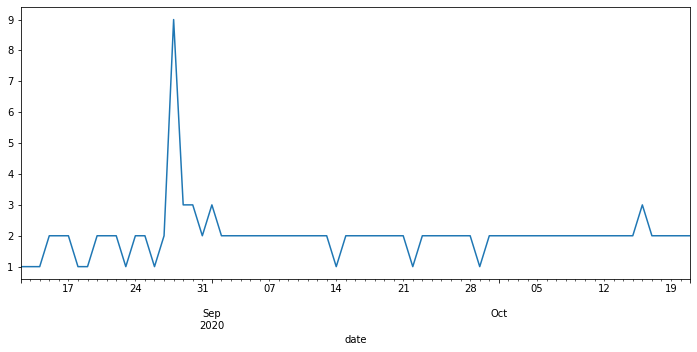

In [216]:
fig=px.line(trends,x=trends.index,y='Apex',title='Google trends data for Apex')
fig.show()

In [276]:
series = series.resample('d').sum()
series = series.cumsum()

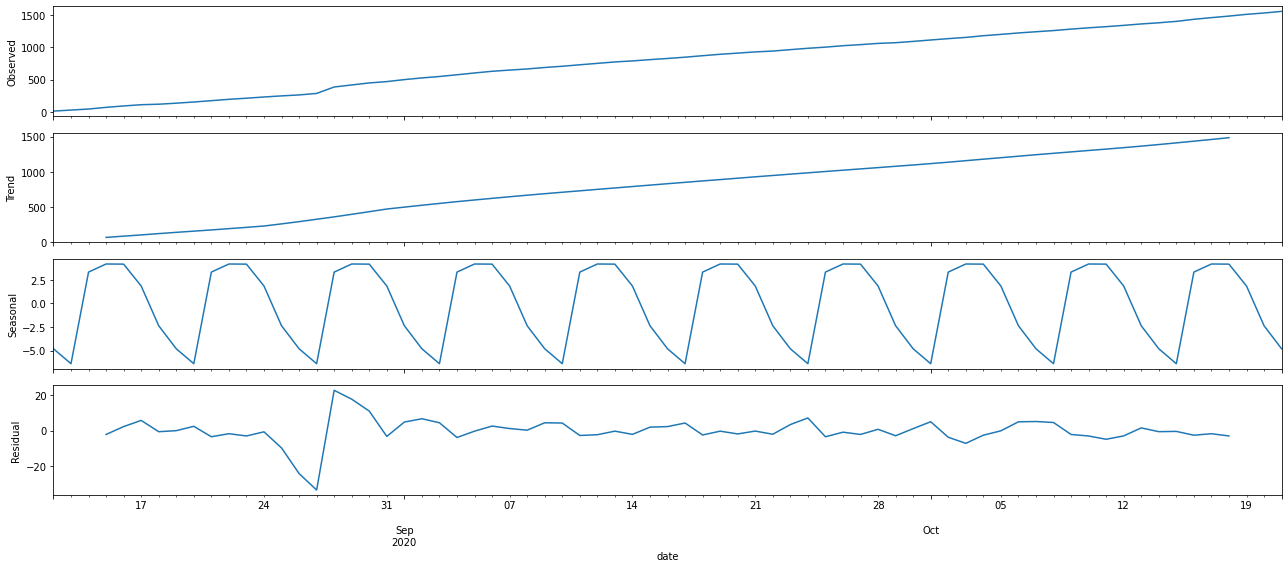

In [277]:
#The best part about time series data and decomposition is that you can break down the data into the following:
#Time Series Decomposition. 
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(series, model='additive')
fig = decomposition.plot()
plt.show()

In [219]:
#GRID SEARCH for Param Tuning.
#Sample params for seasonal arima. (SARIMAX).

#For each combination of parameters, we fit a new seasonal ARIMA model with the SARIMAX() function 
#from the statsmodels module and assess its overall quality.

import itertools
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 26) for x in list(itertools.product(p, d, q))]

In [220]:

#The code tests the given params using sarimax and outputs the AIC scores.

for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(series,order=param,seasonal_order=param_seasonal,enforce_stationarity=False,enforce_invertibility=False)

            results = mod.fit()

            print('SARIMA{}x{}26 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

SARIMA(0, 0, 0)x(0, 0, 0, 26)26 - AIC:821.0995481140552
SARIMA(0, 0, 0)x(0, 1, 0, 26)26 - AIC:476.881096264809
SARIMA(0, 0, 0)x(1, 0, 0, 26)26 - AIC:440.9360713578263
SARIMA(0, 0, 0)x(1, 1, 0, 26)26 - AIC:100.07141896721161
SARIMA(0, 0, 1)x(0, 0, 0, 26)26 - AIC:722.55565209804
SARIMA(0, 0, 1)x(0, 1, 0, 26)26 - AIC:411.4115357985416
SARIMA(0, 0, 1)x(1, 0, 0, 26)26 - AIC:388.2046221056515


/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


SARIMA(0, 0, 1)x(1, 1, 0, 26)26 - AIC:102.61763775674427
SARIMA(0, 1, 0)x(0, 0, 0, 26)26 - AIC:309.6601313980583
SARIMA(0, 1, 0)x(0, 1, 0, 26)26 - AIC:139.0646850416176
SARIMA(0, 1, 0)x(1, 0, 0, 26)26 - AIC:128.46724315165832
SARIMA(0, 1, 0)x(1, 1, 0, 26)26 - AIC:22.724544599119877
SARIMA(0, 1, 1)x(0, 0, 0, 26)26 - AIC:268.5144328976262
SARIMA(0, 1, 1)x(0, 1, 0, 26)26 - AIC:136.02281117401873
SARIMA(0, 1, 1)x(1, 0, 0, 26)26 - AIC:121.61546418802779
SARIMA(0, 1, 1)x(1, 1, 0, 26)26 - AIC:24.719109421680674
SARIMA(1, 0, 0)x(0, 0, 0, 26)26 - AIC:249.72904235361628
SARIMA(1, 0, 0)x(0, 1, 0, 26)26 - AIC:143.61065516368734
SARIMA(1, 0, 0)x(1, 0, 0, 26)26 - AIC:58.17539895322819
SARIMA(1, 0, 0)x(1, 1, 0, 26)26 - AIC:21.556149774034893
SARIMA(1, 0, 1)x(0, 0, 0, 26)26 - AIC:230.02831306519735
SARIMA(1, 0, 1)x(0, 1, 0, 26)26 - AIC:140.17928354946918
SARIMA(1, 0, 1)x(1, 0, 0, 26)26 - AIC:52.946457673208776
SARIMA(1, 0, 1)x(1, 1, 0, 26)26 - AIC:22.911514613899918
SARIMA(1, 1, 0)x(0, 0, 0, 26)26 - A

In [221]:
#Fit the model with the best params.
#SARIMA(1, 0, 0)x(1, 1, 0, 26)26 - AIC:21.556149774034893

#we should consider this to be optimal option.

from statsmodels.tsa.statespace.sarimax import SARIMAX
mod = sm.tsa.statespace.SARIMAX(series,
                                order=(1, 0, 0),
                                seasonal_order=(1, 1, 0, 26),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0033      0.084     11.935      0.000       0.839       1.168
ar.S.L26      -0.0022      0.177     -0.012      0.990      -0.348       0.344
sigma2         0.1389      1.721      0.081      0.936      -3.234       3.512


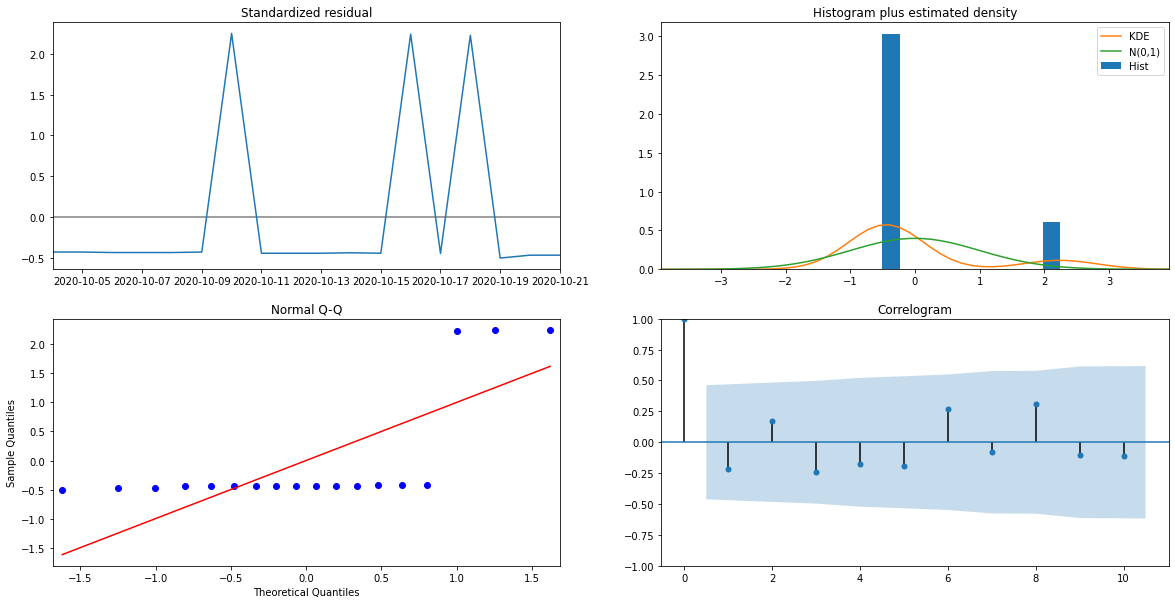

In [222]:
#Plotting the diagnostics.

#The plot_diagnostics object allows us to quickly generate model diagnostics and investigate for any unusual behavior.
results.plot_diagnostics(figsize=(20,10))
plt.show()


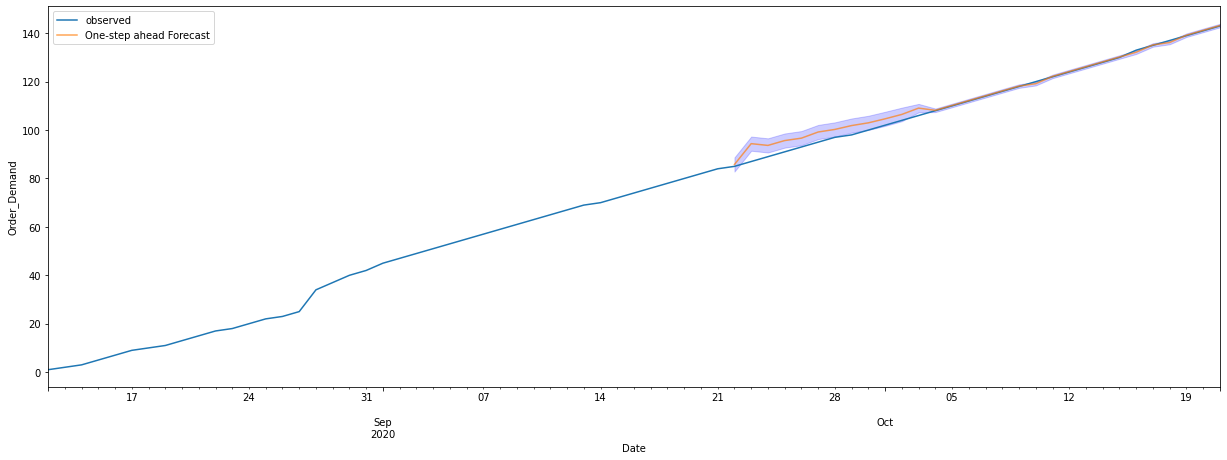

In [223]:
#Lets get the predictions and confidence interval for those predictions.
#Get the predictions. The forecasts start from the 1st of Jan 2017 but the previous line shows how it fits to the data.
pred = results.get_prediction(start=pd.to_datetime('2020-09-22'), dynamic=False) #false is when using the entire history.
#Confidence interval.
pred_ci = pred.conf_int(95)

#Plotting real and forecasted values.
ax = series['2013':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(21, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='blue', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Order_Demand')
plt.legend()
plt.title('Forcasted Traffic for Apex')
plt.show()

#Takeaway: The forecats seems to be fitting well to the data. The Blue/purple thicker plot shows the confidence level in the forecasts. 

In [224]:
#Getting the mean squared error (average error of forecasts).
y_forecasted = pred.predicted_mean
y_truth = series['2020-09-22':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('MSE {}'.format(round(mse, 2)))

#Smaller the better.

MSE 6.29


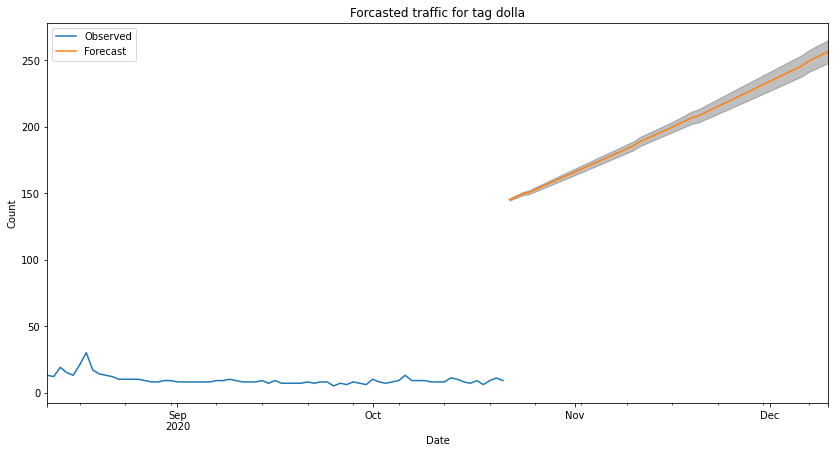

In [297]:
#The time can be changed using steps.
pred_uc = results.get_forecast(steps=50)
pred_ci = pred_uc.conf_int(95)
ax = series.plot(label='Observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Count')
plt.legend()
plt.title('Forcasted traffic for tag dolla')
plt.show()

# Hourly API data


In [248]:
trends = pytrend.get_historical_interest(kw_list, year_start=2020, month_start=8, day_start=20, hour_start=0, year_end=2020, month_end=10, day_end=11, hour_end=0, geo='US', gprop='youtube')

HTTPSConnectionPool(host='trends.google.com', port=443): Read timed out. (read timeout=5)
